# Лабораторная работа #5
## Выполнили Смирнов Егор и Максимов Артем

В этой лабораторной нашей задачей былп работа с датасетом из написанных английских букв. Первым делом мы построили простенькую нейронную сеть с 2-3 скрытыми слоями.


In [45]:
import numpy as np
import tensorflow as tf

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D

import pandas as pd
train = pd.read_csv('train.csv', header = None)

y_train = train.iloc[:, 0:1].copy()
x_train = train.iloc[:, 1:785].copy()

test = pd.read_csv('test.csv', header = None)

y_test = test.iloc[:, 0:1].copy()
x_test = test.iloc[:, 1:785].copy()

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = x_train.values.reshape((-1, 784))
x_test = x_test.values.reshape((-1, 784))

N, M = x_train.shape
O = 1024
P = 512
T = 27
batch_size = 100
learning_rate = 0.001
training_epochs = 22

model = Sequential()

model.add(Dense(P))
model.add(Dropout(rate = 0.3))
model.add(Activation('relu'))

model.add(Dense(P))
model.add(Dropout(rate = 0.3))
model.add(Activation('relu'))

model.add(Dense(T, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=training_epochs, batch_size=batch_size)
score = model.evaluate(x_test, y_test, batch_size=batch_size)
print(score)

Epoch 1/22
65000/65000 [==============================] - 4s 67us/step - loss: 0.9114 - acc: 0.7236
Epoch 2/22
65000/65000 [==============================] - 4s 65us/step - loss: 0.5018 - acc: 0.8424
Epoch 3/22
65000/65000 [==============================] - 4s 59us/step - loss: 0.4106 - acc: 0.8656
Epoch 4/22
65000/65000 [==============================] - 4s 55us/step - loss: 0.3626 - acc: 0.8800
Epoch 5/22
65000/65000 [==============================] - 4s 62us/step - loss: 0.3267 - acc: 0.8895
Epoch 6/22
65000/65000 [==============================] - 4s 60us/step - loss: 0.2998 - acc: 0.8972
Epoch 7/22
65000/65000 [==============================] - 4s 62us/step - loss: 0.2772 - acc: 0.9054
Epoch 8/22
65000/65000 [==============================] - 4s 61us/step - loss: 0.2671 - acc: 0.9080
Epoch 9/22
65000/65000 [==============================] - 4s 63us/step - loss: 0.2505 - acc: 0.9121
Epoch 10/22
65000/65000 [==============================] - 4s 63us/step - loss: 0.2425 - acc: 0.9148

Значение score = 0.915. Это довольно маленькая точность на тестовых данных

В данном случае мы взяли 2 обычных плотных слоя, после каждого делается дропаут трети нейронов(для предотвращения переобучения). Функцией активации является ReLU, тк она дает лучшие результаты среди всех запусков, которые мы делали

Количество нейронов на обоих внутренних слоях выбрано одинаковым и равным 512 потому что это дало лучшие результаты в ходе тестирования. Большие значения увеличивали время работы, не давая прироста по значению score

Попробуем сеть с 3 скрытыми слоями

In [2]:
import numpy as np
import tensorflow as tf

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten

import pandas as pd
train = pd.read_csv('train.csv', header = None)

y_train = train.iloc[:, 0:1].copy()
x_train = train.iloc[:, 1:785].copy()

test = pd.read_csv('test.csv', header = None)

y_test = test.iloc[:, 0:1].copy()
x_test = test.iloc[:, 1:785].copy()

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.


x_train = x_train.values.reshape(x_train.shape[0],28,28,1)
x_test = x_test.values.reshape(x_test.shape[0],28,28,1)

O = 1024
P = 512
T = 27
batch_size = 100
learning_rate = 0.001
training_epochs = 50

model = Sequential()

model.add(Conv2D(96, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(P))
model.add(Dropout(rate = 0.3))
model.add(Activation('relu'))

model.add(Dense(P))
model.add(Dropout(rate = 0.3))
model.add(Activation('relu'))

model.add(Dense(T, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=training_epochs, batch_size=batch_size)
score = model.evaluate(x_test, y_test, batch_size=batch_size)
print(score)

Epoch 1/50
65000/65000 [==============================] - 25s 385us/step - loss: 0.7542 - acc: 0.7674
Epoch 2/50
65000/65000 [==============================] - 14s 208us/step - loss: 0.3524 - acc: 0.8846
Epoch 3/50
65000/65000 [==============================] - 14s 208us/step - loss: 0.2765 - acc: 0.9053
Epoch 4/50
65000/65000 [==============================] - 14s 215us/step - loss: 0.2289 - acc: 0.9194
Epoch 5/50
65000/65000 [==============================] - 14s 217us/step - loss: 0.1981 - acc: 0.9315
Epoch 6/50
65000/65000 [==============================] - 14s 215us/step - loss: 0.1765 - acc: 0.9372
Epoch 7/50
65000/65000 [==============================] - 14s 216us/step - loss: 0.1597 - acc: 0.9414
Epoch 8/50
65000/65000 [==============================] - 14s 218us/step - loss: 0.1413 - acc: 0.9475
Epoch 9/50
65000/65000 [==============================] - 14s 216us/step - loss: 0.1336 - acc: 0.9504
Epoch 10/50
65000/65000 [==============================] - 14s 214us/step - loss: 

Результат score = 0.927 получше, чем был

Здесь,1м скрытым слоем является сверточный слой с размером ядра 3х3 пикселя. Затем с помощью MaxPolling2D мы уменьшили размерность и сделали дропаут трети нейронов. После, выровняли данные, чтобы пропустить их еще через 2 плотных слоя

Идея, связанная с количеством нейронов в слоях та же, что и в сети выше

Однако 95% таким образом не выбить. Поэтому мы еще добавили еще слоев

# Модель с точностью больше 0.95

In [2]:
import numpy as np
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten

import pandas as pd
train = pd.read_csv('train.csv', header = None)

y_train = train.iloc[:, 0:1].copy()
x_train = train.iloc[:, 1:785].copy()

test = pd.read_csv('test.csv', header = None)

y_test = test.iloc[:, 0:1].copy()
x_test = test.iloc[:, 1:785].copy()

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = x_train.values.reshape(x_train.shape[0],28,28,1)
x_test = x_test.values.reshape(x_test.shape[0],28,28,1)

batch_size = 100
learning_rate = 0.001
training_epochs = 50

from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir = './logs', write_graph = True)

model = Sequential()
model.add(Conv2D(96, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(96, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(27, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=learning_rate, amsgrad=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=training_epochs, batch_size=batch_size, callbacks = [tensorboard])

score = model.evaluate(x_test, y_test, batch_size=batch_size)
print(score)

Epoch 1/50
65000/65000 [==============================] - 10s 157us/step - loss: 1.0650 - acc: 0.6744
Epoch 2/50
65000/65000 [==============================] - 9s 145us/step - loss: 0.4455 - acc: 0.8566
Epoch 3/50
65000/65000 [==============================] - 10s 147us/step - loss: 0.3549 - acc: 0.8842
Epoch 4/50
65000/65000 [==============================] - 9s 143us/step - loss: 0.3127 - acc: 0.8979
Epoch 5/50
65000/65000 [==============================] - 9s 143us/step - loss: 0.2814 - acc: 0.9059
Epoch 6/50
65000/65000 [==============================] - 9s 143us/step - loss: 0.2664 - acc: 0.9109
Epoch 7/50
65000/65000 [==============================] - 9s 143us/step - loss: 0.2460 - acc: 0.9165
Epoch 8/50
65000/65000 [==============================] - 9s 143us/step - loss: 0.2353 - acc: 0.9207
Epoch 9/50
65000/65000 [==============================] - 9s 143us/step - loss: 0.2255 - acc: 0.9235
Epoch 10/50
65000/65000 [==============================] - 9s 144us/step - loss: 0.2208 -

In [4]:
from keras.models import load_model
model = load_model('my_model.h5')

Using TensorFlow backend.


Через раз модель то обучается до 0.95, то остается на 0.9495-0.9499. Ниже приведен код для "дообучения" до 0.95 на тестовых данных


In [21]:
while(score[1]<0.95):
    history = model.fit(x_train, y_train,
    batch_size=batch_size,
    epochs=1,
    verbose=0,
    callbacks = [tensorboard])
    score = model.evaluate(x_test, y_test, verbose=0)
print(score)

[0.14965685381052585, 0.9500769271300389]


Воспользуемся колбеком tensorboard, чтобы посмотреть как росла accuracy и падала loss:

In [ ]:
!tensorboard --logdir=./logs

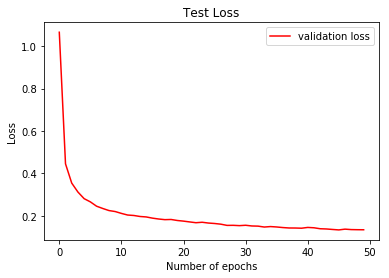

In [4]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='r', label= "validation loss")
plt.title("Test Loss")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



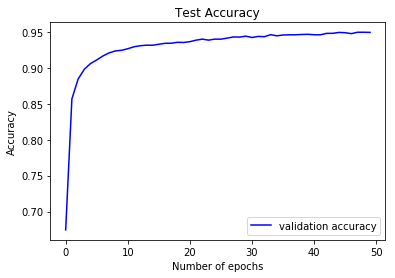

In [5]:
plt.plot(history.history['acc'], color='b', label= "validation accuracy")
plt.title("Test Accuracy")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



Исходя из графиков выше мы видим, что loss уменьшается, а accuracy растет до 0.95, тч именно эта модель выбрана лучшей и продолжать работать мы будем с ней.

Построим схему нейронки с помощью модуля SVG:

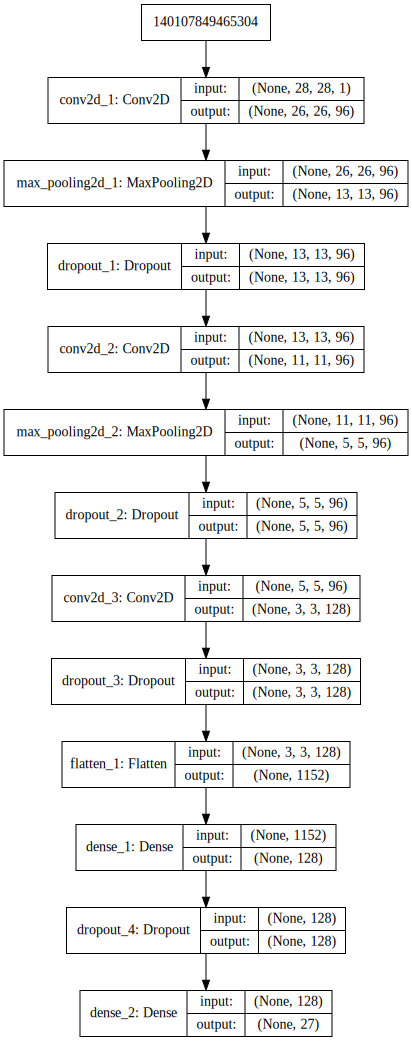

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes = True).create(prog = 'dot', format = 'svg'))

Дальше мы построили матрицу смежности для всех букв:

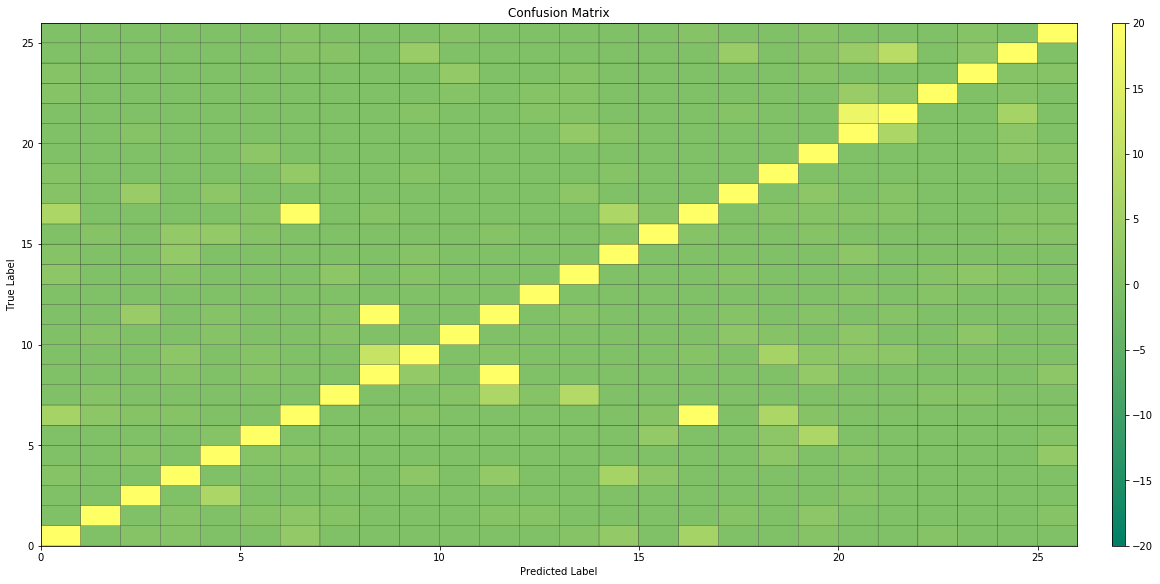

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.cm as cm

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

fig,ax = plt.subplots(figsize=(16,8), constrained_layout = True)
im = ax.pcolor(confusion_mtx, cmap=cm.summer, edgecolors='k', vmin=-20, vmax=20, linewidths=0.2)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
fig.colorbar(im, ax = ax, aspect=80)
plt.show()

Примеры картинок, которые определены с ошибкой:

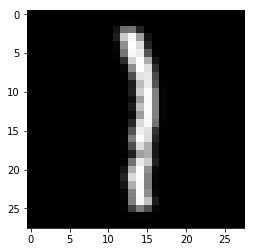

true label: i , train label - l


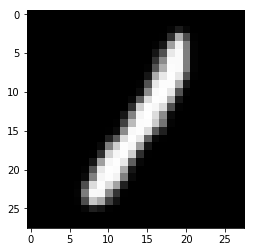

true label: i , train label - l


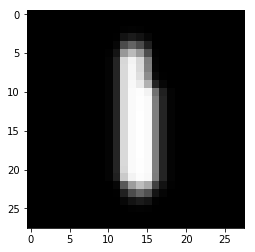

true label: l , train label - i


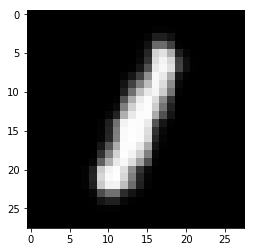

true label: l , train label - i


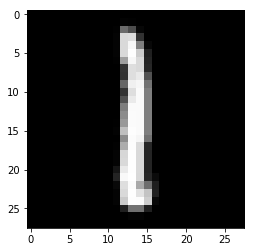

true label: i , train label - l


In [17]:
def shit(s):
    return chr(ord('a') + s - 1)

k = 0
threshold = 4
for i in range(len(x_train)):
    x = x_train[i].reshape(1,28,28,1)
    yTrain = shit(np.argmax(model.predict(x)))
    yTrue = shit(np.argmax(y_train[i]))
    
    if (k > threshold):
        break
    if yTrain != yTrue:
        k += 1
        plt.imshow(x_train[i].T.reshape((28, 28)), cmap='gray')
        plt.show()
        print('true label:', yTrue, ', train label -', yTrain)

 Среди букв, которые часто путаются между собой, можно выделить пары: 

- q - g
- v - u
- l - i
- j - i
- q - a
- g - a
- y - v
- r - n
- q - o
- o - d

Эти пары букв легко спутать, тк все они отличаются какой-то мелочью, например, "q" и "g" отличабтся лишь хвостиком, "v" и "u" изгибом буквы, а "l" и "i" точкой над "i". В остальных парах ситуация аналогична, поэтому неудвительно, что сеть путает эти буквы - при плохом написании их будет сложно отличить и обычному человеку

 Рассмотрим насколько равномерно обучилась наша модель. Для этого найдем процентное отношение количества ошибок для каждой буквы к общему количеству ошибок

In [27]:
args = np.zeros(26)
orks = np.zeros(26)

for i in range (y_test.shape[0]):
    x = x_test[i].reshape(1,28,28,1)
    y = np.argmax(model.predict(x))
    if np.argmax(y_test[i]) != y:
        args[y - 1] += 1
    else:
        orks[y - 1] += 1
    

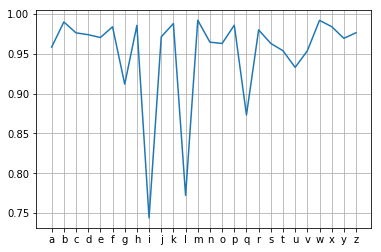

In [41]:
def char_range(c1, c2):
    arr = []
    for c in range(ord(c1), ord(c2)+1):
        arr.append(chr(c))
    return arr

plt.xticks(ticks=range(26), labels=char_range('a', 'z'))
plt.plot(range(26), orks/(orks+args))
plt.grid(True)
plt.show()

,0
count,26.000000
mean,3.846154
std,4.892472
min,0.616333
25%,1.232666
50%,2.234206
75%,3.466872
max,20.955316


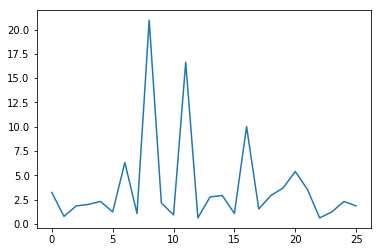

In [26]:
args = args*100/sum(args)
plt.plot(range(26), args)

pd.DataFrame(data=args).describe()

Как мы видим, есть несколько пиков - модель обучилась неравномерно и на каких-то буквах система ошибается чаще.

Максимальная ошибка соответсвует 8 букве - "h". Это произошло из-за того, что ее можно написать так криво, что она будет похоже и на "n", и даже на "b".

Процент детекции для буквы "h" : 75% 

Минимальная ошибка соответсвует букве "w". Это можно объяснить тем, что ни одна буква не пишется похожим на "w" образом. Это заметно и на матрице смежности.

Процент детекции для "w": 98-99%

Рассмoтрим 1е буквы наших фамилий - "S" и "М".

Для "s" процент определения равен 96%, а для "m" значение почти максимальное и равно 97%

# Цветовая карта:

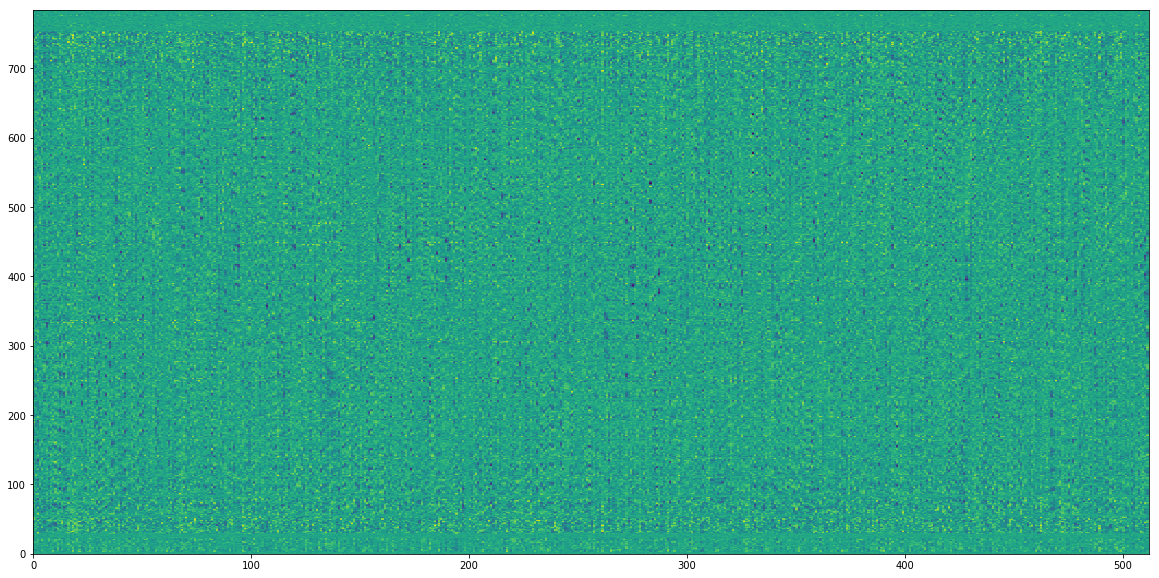

In [55]:
plt.figure(figsize=(20, 10))
plt.pcolor(model.layers[0].get_weights()[0])

Мы попытались построить карту для 1го слоя нашей сети. Он - сверточный, тч по идее походит на задание на 4 балла, но что делать с этим - непонятно

# Творческое задание

Картинки мы получали следующим образом: фотография буквы, написанной черной ручкой на белом листе 
    
1) преобразовывали к размеру 28х28

In [61]:
import os
import PIL.Image as Img

folder = 'photos'
new_folder = 'letters'
px = 28
feat = px**2*3
for i in (['a','b','B','e','g','n','p','u']):
    name = '_'.join(['foto', str(i)])
    name = '.'.join([name, 'png'])
    source = os.path.join(folder, name)
    dest = os.path.join(new_folder, name)
    img = Img.open(source)
    img = img.resize((px, px), Img.LANCZOS)
    img.save(dest)


Тк картинка в идеале черно-белая, то 

2) взять негатив от этой фотографии

на деле сфотографировать без аппаратуры хорошо невозможно, поэтому на фотографиях остались тени. Их мы исправляли функцией got2, которая брала значение пикселя и делало его черным/белым в зависимости от его значения - таким обраом решилась проблема серых полутонов  

In [63]:
 from PIL import Image, ImageDraw #Подключим необходимые библиотеки. 
 
    
def got2(x):
    if x>130:
        return 255;
    else:
        return 0
        
for letter in (['a','b','B','e','g','n','p','u']):
#for letter in (['b']):
    image = Image.open("letters/foto_" + letter + ".png") #Открываем изображение. 
    draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 
    width = image.size[0] #Определяем ширину. 
    height = image.size[1] #Определяем высоту. 	
    pix = image.load() #Выгружаем значения пикселей

    
    for i in range(width):
            for j in range(height):
                a = pix[i, j][0]
                b = pix[i, j][1]
                c = pix[i, j][2]
                a1 = got2(255 - a)
                a2 = got2(255 - b)
                a3 = got2(255 - c)
                if ((a1 == 255) and (a2 == 255)) or ((a1 == 255) and (a3 == 255))  or ((a2 == 255) and (a3) == 255):
                    draw.point((i, j), (255,255,255))
                if ((a1 == 0) and (a2 == 0)) or ((a1 == 0) and (a3 == 0))  or ((a2 == 0) and (a3) == 0):
                    draw.point((i, j), (0,0,0))
                if ((a1 == 255) and(a2 == 255) and (a3 == 255)):
                    draw.point((i, j), (255,255,255))
                if ((a1 == 0) and(a2 == 0) and (a3 == 0)):
                    draw.point((i, j), (0,0,0))
                    
            
    image.save(letter + ".png", "PNG")
    del draw

Получив некоторое количество картинок мы запустили проверку

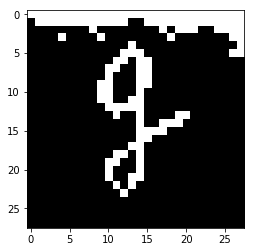

g
None


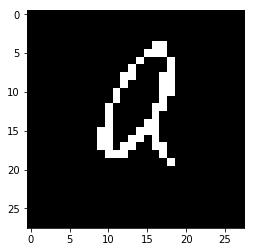

q
None


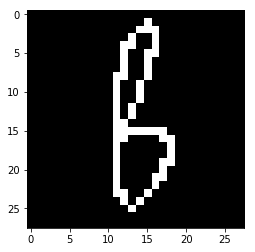

g
None


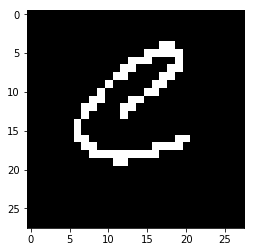

g
None


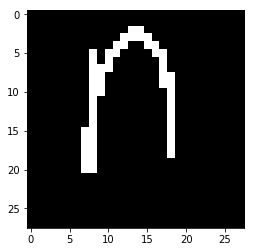

q
None


In [64]:
import os
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
    
def check(letter):
    im = Image.open(letter + ".png")
    image = []
    for pixel in iter(im.getdata()):
        image.append(pixel[0])
    image = np.asarray(image)
    image = image.reshape(1,28, 28, 1)
    
    score = model.predict(image.T)
    plt.imshow(image.reshape((28, 28)), cmap='gray')
    plt.show()
    print(shit(np.argmax(score)))

    
for i in (['g', 'a', 'b', 'e', 'n']):
    check(i)


Получилось как-то не очень хорошо.


![Альтернативный текст](gaben.jpg)

С буквой "g" что-то случилось только при последнем ране. До этого все с ней было хорошо. Это странно

Но у нас есть еще одна буква:


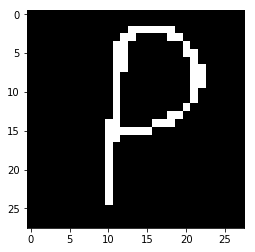

p
None


In [67]:
check('p')

Вот, пара букв у нас все же есть. И точность выше 0.95. Выглядит неплохо